In [1]:
# recarregar automaticamente as alterações que fizermos no .py
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('data/application_train.csv', index_col='SK_ID_CURR')

df_test = pd.read_csv('data/application_test_student.csv', index_col='SK_ID_CURR')

df_description = pd.read_csv('data/HomeCredit_columns_description.csv', index_col='Row', encoding='ISO-8859-1').drop(columns='Unnamed: 0').T

In [5]:
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
456162           0         Cash loans           F            N   
134978           0         Cash loans           F            N   
318952           0         Cash loans           M            Y   
361264           0         Cash loans           F            N   
260639           0         Cash loans           F            N   
...            ...                ...         ...          ...   
242114           0         Cash loans           F            N   
452374           0         Cash loans           F            N   
276545           1    Revolving loans           M            N   
236776           1         Cash loans           M            Y   
454197           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
456162                   N             0          112500.0    700830.0   
134978                   N             0           90000.0    375322.5   
318952                   N             0          180000.0    544491.0   
361264                   Y             0          270000.0    814041.0   
260639                   Y             0          144000.0    675000.0   
...                    ...           ...               ...         ...   
242114                   Y             1          270000.0   1172470.5   
452374                   Y             0          180000.0    654498.0   
276545                   N             1          112500.0    270000.0   
236776                   N             3          202500.0    204858.0   
454197                   Y             2           81000.0    547344.0   

            AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
SK_ID_CURR                                                 
456162          22738.5         585000.0   Unaccompanied   
134978          14422.5         324000.0   Unaccompanied   
318952          16047.0         454500.0   Unaccompanied   
361264          28971.0         679500.0   Unaccompanied   
260639          21906.0         675000.0   Unaccompanied   
...                 ...              ...             ...   
242114          34411.5         918000.0   Unaccompanied   
452374          27859.5         585000.0   Unaccompanied   
276545          13500.0         270000.0   Unaccompanied   
236776          17653.5         171000.0   Unaccompanied   
454197          23139.0         472500.0   Unaccompanied   

                NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                        
456162                   Working              Incomplete higher   
134978      Commercial associate  Secondary / secondary special   
318952                   Working  Secondary / secondary special   
361264                 Pensioner  Secondary / secondary special   
260639                   Working  Secondary / secondary special   
...                          ...                            ...   
242114      Commercial associate  Secondary / secondary special   
452374                 Pensioner  Secondary / secondary special   
276545                   Working  Secondary / secondary special   
236776                   Working  Secondary / secondary special   
454197                   Working  Secondary / secondary special   

              NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
SK_ID_CURR                                            
456162      Single / not married  House / apartment   
134978                   Married  House / apartment   
318952                   Married  House / apartment   
361264                   Married  House / apartment   
260639                 Separated  House / apartment   
...                          ...                ...   
242114            Civil marriage  House / apartment   
452374                   Married  House / 

In [6]:
df_description

Row                            SK_ID_CURR  \
Table        application_{train|test}.csv   
Description      ID of loan in our sample   
Special                               NaN   

Row                                                     TARGET  \
Table                             application_{train|test}.csv   
Description  Target variable (1 - client with payment diffi...   
Special                                                    NaN   

Row                                   NAME_CONTRACT_TYPE  \
Table                       application_{train|test}.csv   
Description  Identification if loan is cash or revolving   
Special                                              NaN   

Row                           CODE_GENDER                   FLAG_OWN_CAR  \
Table        application_{train|test}.csv   application_{train|test}.csv   
Description          Gender of the client  Flag if the client owns a car   
Special                               NaN                            NaN   

Row                              FLAG_OWN_REALTY  \
Table               application_{train|test}.csv   
Description  Flag if client owns a house or flat   
Special                                      NaN   

Row                               CNT_CHILDREN              AMT_INCOME_TOTAL  \
Table             application_{train|test}.csv  application_{train|test}.csv   
Description  Number of children the client has          Income of the client   
Special                                    NaN                           NaN   

Row                            AMT_CREDIT                   AMT_ANNUITY  \
Table        application_{train|test}.csv  application_{train|test}.csv   
Description     Credit amount of the loan                  Loan annuity   
Special                               NaN                           NaN   

Row                                            AMT_GOODS_PRICE  \
Table                             application_{train|test}.csv   
Description  For consumer loans it is the price of the good...   
Special                                                    NaN   

Row                                            NAME_TYPE_SUITE  \
Table                             application_{train|test}.csv   
Description  Who was accompanying client when he was applyi...   
Special                                                    NaN   

Row                                           NAME_INCOME_TYPE  \
Table                             application_{train|test}.csv   
Description  Clients income type (businessman, working, mat...   
Special                                                    NaN   

Row                                     NAME_EDUCATION_TYPE  \
Table                          application_{train|test}.csv   
Description  Level of highest education the client achieved   
Special                                                 NaN   

Row                    NAME_FAMILY_STATUS  \
Table        application_{train|test}.csv   
Description   Family status of the client   
Special                               NaN   

Row                                          NAME_HOUSING_TYPE  \
Table                             application_{train|test}.csv   
Description  What is the housing situation of the client (r...   
Special                                                    NaN   

Row                                 REGION_POPULATION_RELATIVE  \
Table                             application_{train|test}.csv   
Description  Normalized population of region where client l...   
Special                                            normalized    

Row                                               DAYS_BIRTH  \
Table                           application_{train|test}.csv   
Description  Client's age in days at the time of application   
Special                time only relative to the application   

Row                                              DAYS_EMPLOYED  \
Table                             application_{train|test}.csv   
Description  How many days be

In [7]:
df.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  246008.000000  246008.000000      2.460080e+05  2.460080e+05   
mean        0.081176       0.415527      1.689122e+05  5.996283e+05   
std         0.273106       0.719922      2.603818e+05  4.030672e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.485000e+05  5.147775e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  245998.000000     2.457820e+05               246008.000000   
mean    27129.162648     5.389289e+05                    0.020882   
std     14504.965232     3.699738e+05                    0.013852   
min      1615.500000     4.050000e+04                    0.000290   
25%     16561.125000     2.385000e+05                    0.010006   
50%     24930.000000     4.500000e+05                    0.018850   
75%     34599.375000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  246008.000000  246008.000000      246008.000000    246008.000000   
mean   -16042.794393   63963.755699       -4988.033300     -2991.647642   
std      4365.973763  141400.318322        3520.987048      1510.020637   
min    -25229.000000  -17912.000000      -23738.000000     -7197.000000   
25%    -19691.000000   -2758.000000       -7481.000000     -4297.250000   
50%    -15763.000000   -1215.000000       -4503.000000     -3250.000000   
75%    -12418.000000    -289.000000       -2018.000000     -1715.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

        OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  83649.000000  246008.000000   246008.000000    246008.000000   
mean      12.034346       0.999996        0.819481         0.199095   
std       11.861705       0.002016        0.384620         0.399321   
min        0.000000       0.000000        0.000000         0.000000   
25%        5.000000       1.000000        1.000000         0.000000   
50%        9.000000       1.000000        1.000000         0.000000   
75%       15.000000       1.000000        1.000000         0.000000   
max       91.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count     246008.000000  246008.000000  246008.000000    246007.000000   
mean           0.998138       0.281023       0.056722         2.150760   
std            0.043108       0.449500       0.231311         0.909167   
min            0.000000       0.000000       0.000000         1.000000   
25%            1.000000       0.000000       0.000000         2.000000   
50%            1.000000       0.000000       0.000000         2.000000   
75%            1.000000       1.000000       0.000000         3.000000   
max            1.000000       1.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         246008.000000                246008.000000   
mean               2.052092                     2.031206   
std                0.509063                     0.502715   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            246008.000000               246008.000000   
mean                 12.064518                    0.015186   
std                   3.264923            

In [61]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 456162 to 454197
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18

16 Features nao numericas:

In [9]:
df.select_dtypes(exclude=np.number)

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
456162             Cash loans           F            N               N   
134978             Cash loans           F            N               N   
318952             Cash loans           M            Y               N   
361264             Cash loans           F            N               Y   
260639             Cash loans           F            N               Y   
...                       ...         ...          ...             ...   
242114             Cash loans           F            N               Y   
452374             Cash loans           F            N               Y   
276545        Revolving loans           M            N               N   
236776             Cash loans           M            Y               N   
454197             Cash loans           F            N               Y   

           NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
SK_ID_CURR                                         
456162       Unaccompanied               Working   
134978       Unaccompanied  Commercial associate   
318952       Unaccompanied               Working   
361264       Unaccompanied             Pensioner   
260639       Unaccompanied               Working   
...                    ...                   ...   
242114       Unaccompanied  Commercial associate   
452374       Unaccompanied             Pensioner   
276545       Unaccompanied               Working   
236776       Unaccompanied               Working   
454197       Unaccompanied               Working   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
456162                  Incomplete higher  Single / not married   
134978      Secondary / secondary special               Married   
318952      Secondary / secondary special               Married   
361264      Secondary / secondary special               Married   
260639      Secondary / secondary special             Separated   
...                                   ...                   ...   
242114      Secondary / secondary special        Civil marriage   
452374      Secondary / secondary special               Married   
276545      Secondary / secondary special        Civil marriage   
236776      Secondary / secondary special               Married   
454197      Secondary / secondary special               Married   

            NAME_HOUSING_TYPE        OCCUPATION_TYPE  \
SK_ID_CURR                                             
456162      House / apartment             Core staff   
134978      House / apartment  High skill tech staff   
318952      House / apartment               Managers   
361264      House / apartment                    NaN   
260639      House / apartment               Laborers   
...                       ...                    ...   
242114      House / apartment            Sales staff   
452374      House / apartment                    NaN   
276545      House / apartment               Laborers   
236776           With parents               Laborers   
454197      House / apartment                    NaN   

           WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
SK_ID_CURR                                                      
456162                         FRIDAY           Trade: type 2   
134978                         MONDAY  Business Entity Type 3   
318952                       THURSDAY  Business Entity Type 1   
361264                        TUESDAY                     XNA   
260639                         FRIDAY       Transport: type 4   
...                               ...                     ...   
242114                         FRIDAY  Business Entity Type 3   
452374                       SATURDAY                     XNA   
276545                       SATURDAY  Business Entity Type 3   
236776                         SUNDAY           Self-em

   TARGET    TARGET
0  226038  0.918824
1   19970  0.081176


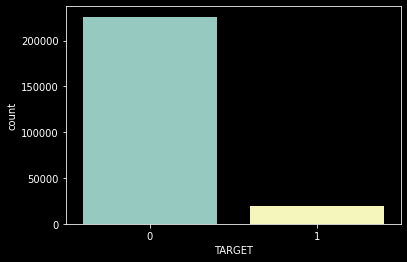

In [10]:
# Verificando o balanceamento do target
show_balance(df.TARGET)

Muito desbalanceado.

Obersevando os sexos:

     CODE_GENDER  CODE_GENDER
F         161867     0.657975
M          84138     0.342013
XNA            3     0.000012


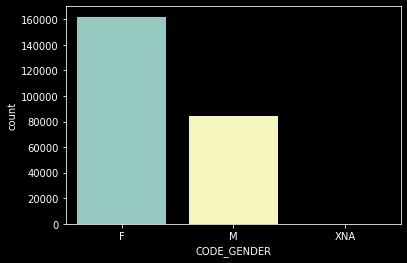

In [11]:
show_balance(df.CODE_GENDER)

In [12]:
df_gender = df.groupby('CODE_GENDER')['TARGET'].value_counts().unstack()
df_gender

TARGET              0        1
CODE_GENDER                   
F            150487.0  11380.0
M             75548.0   8590.0
XNA               3.0      NaN

Nao queremos criar vies, entao o mais correto a se fazer sera inutilizar essa feature. (Nos preprocessamentos)

### Observando os dados nulos

In [13]:
pd.DataFrame(df.isna().sum()/df.shape[0]).T

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0     0.0                 0.0          0.0           0.0              0.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0               0.0         0.0     0.000041         0.000919   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0          0.00426               0.0                  0.0                 0.0   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                0.0                         0.0         0.0            0.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0                0.0              0.0     0.659974         0.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             0.0              0.0               0.0         0.0         0.0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         0.313961         0.000004                   0.0   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          0.0                         0.0   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                      0.0                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                          0.0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                     0.0                     0.0                      0.0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                0.0      0.564221      0.002211      0.198075   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0        0.507931          0.585713                     0.488179   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0         0.665344        0.699075       0.533349       0.503821   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0       0.497882       0.678836       0.59383              0.684035   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0        0.502492                  0.69475           0.552258   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0         0.507931           0.585713                      0.488179   

   YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
0          0.665344         0.699075        0.533349        0.503821   

   FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  \
0        0.497882        0.678836        0.59383               0.684035   

   LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  \
0         0.502492                   0.69475            0.552258   

   APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  \
0         0.507931           0.585713                      0.488179   

   YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  \
0          0.665344         0.699075        0.533349        0.503821   

   FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  \
0        0.497882        0.678836        0.59383               0.684035   

   LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  \
0         0.502492                   0.69475            0.552258   

   FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE  WALLSMATERIAL_MODE  \
0            0.684498        0.502179        0.483062             0.50878   

   EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0             0.474623                  0.003305                  0.003305   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                  0.003305                  0.003305                0.000004   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0              0.0              0.0          

Definindo o impute dos valores nulos que faz mais sentido de cada feature com dados faltantes.

In [6]:
cols ={

'col_unknown': ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', ], # Importante colocar 'Unknown'.

'col_neg_val': ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1' , 'EXT_SOURCE_2','EXT_SOURCE_3', 'ELEVATORS_AVG',
 'ELEVATORS_MODE', 'ELEVATORS_MEDI'], # Importante preencher com valor -1.

'col_neg_or_median': ['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'ANUIDADE_RECEITA', 'BENS_RECEITA', 'RECEITA_PESSOA', 'NUM_ADULTOS', 'PERCENTUAL_CRIANCAS', 'QTD_PAGAMENTOS', 'OWN_CAR_AGE_RATIO', ], # Talvez seja interessante testar setando como -1, depois com a MEDIANA para verificar os resultados.

'col_median': ['AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], # Importante a MEDIANA


'col_zero': ['DAYS_LAST_PHONE_CHANGE'] # Importante preencher com 0.
}

## Verificando alguns outliers

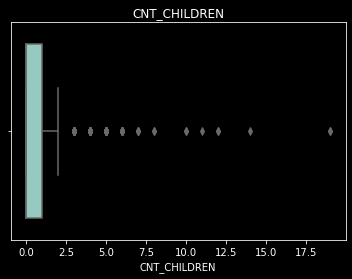

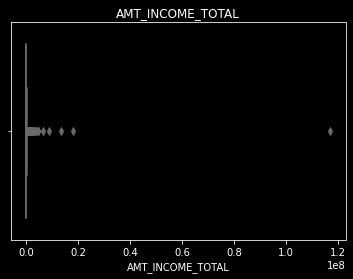

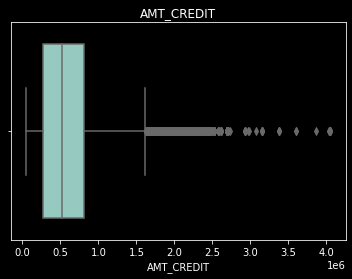

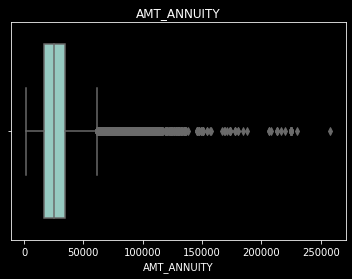

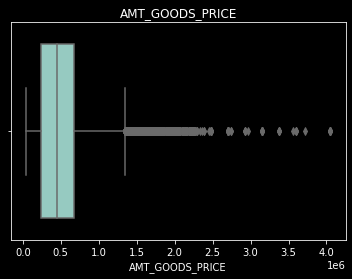

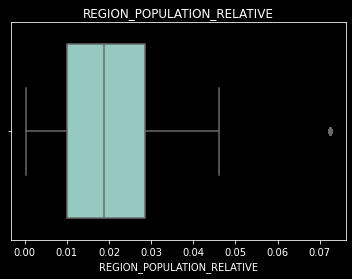

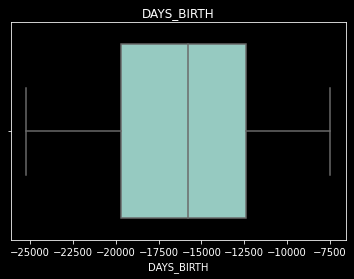

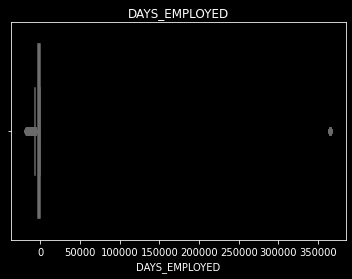

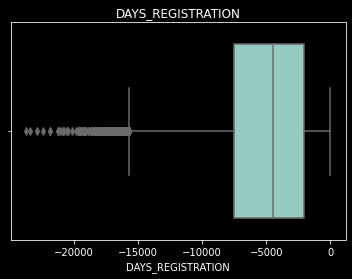

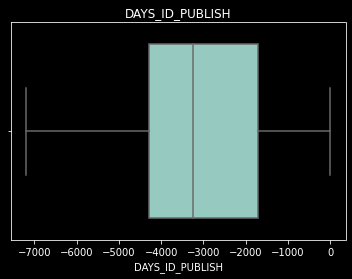

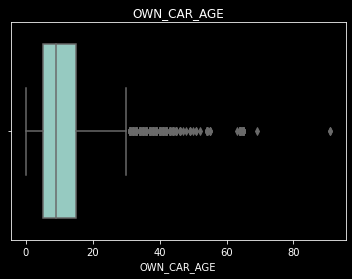

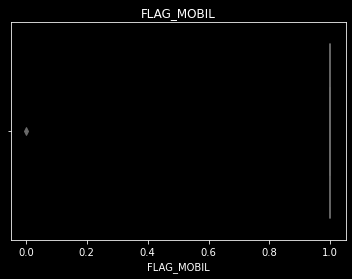

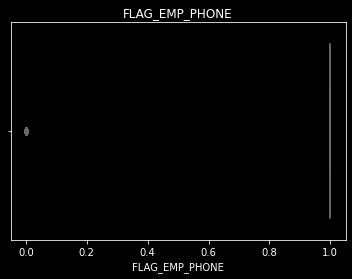

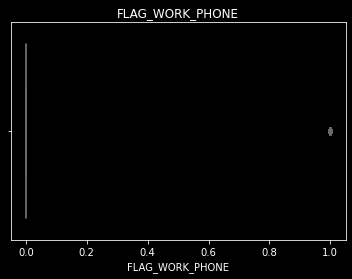

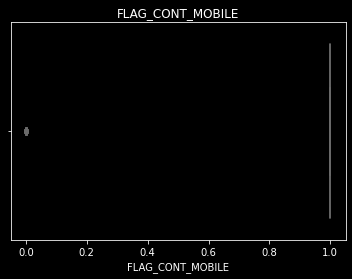

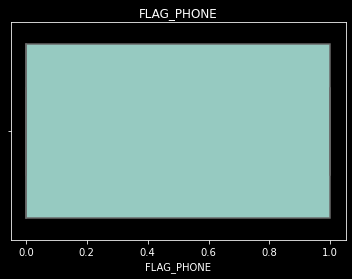

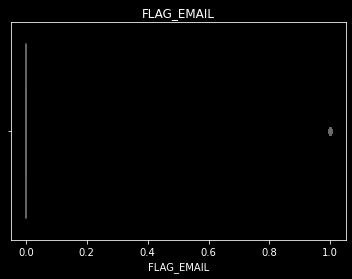

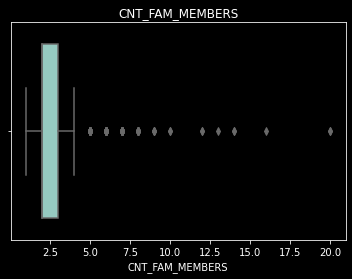

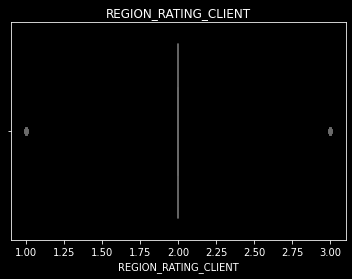

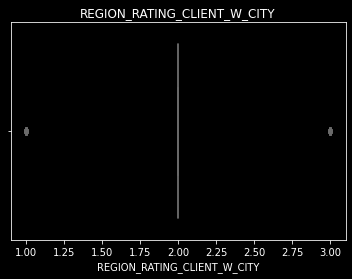

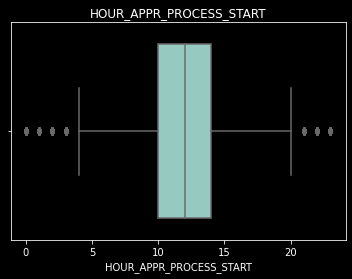

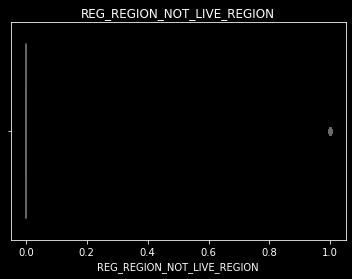

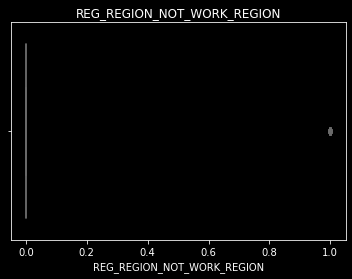

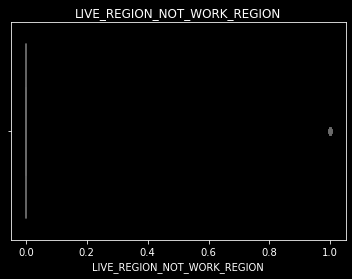

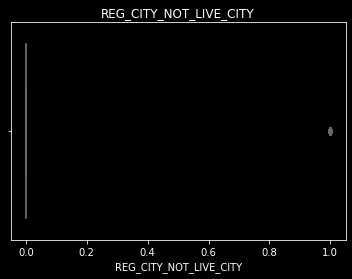

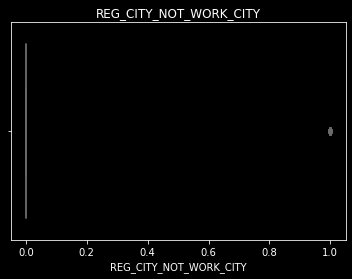

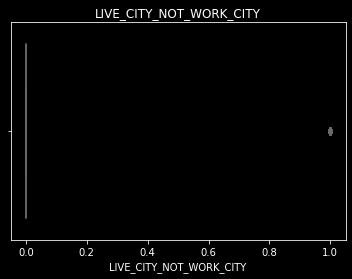

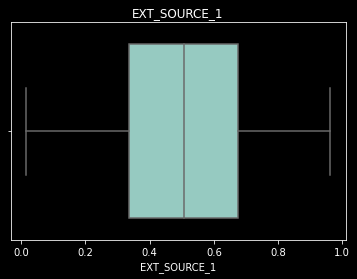

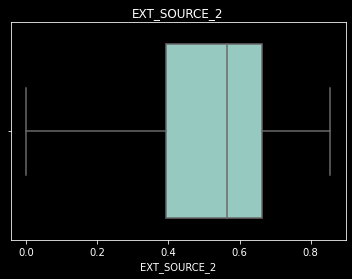

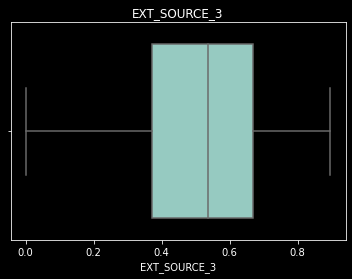

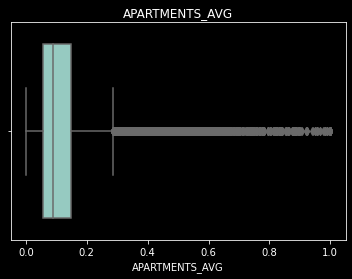

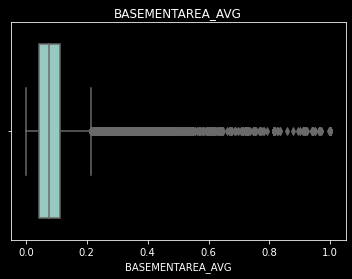

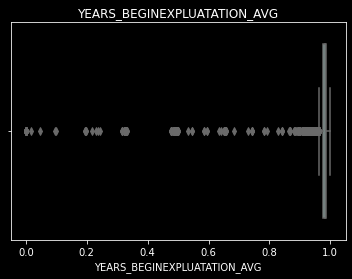

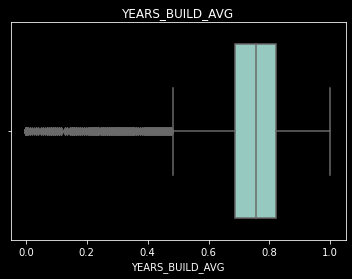

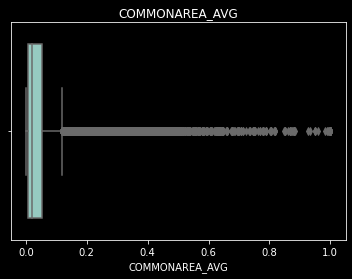

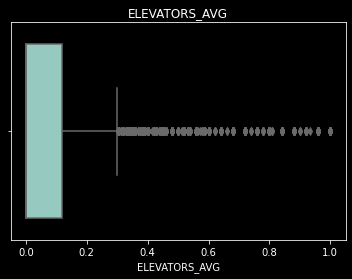

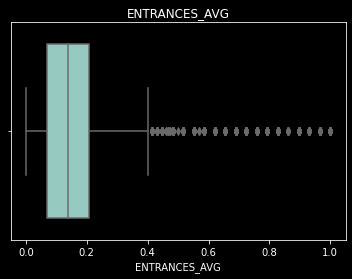

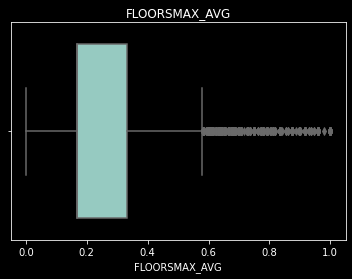

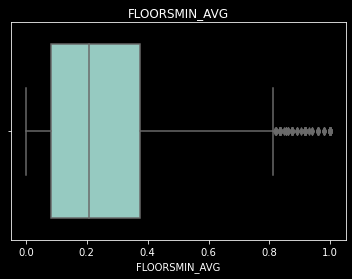

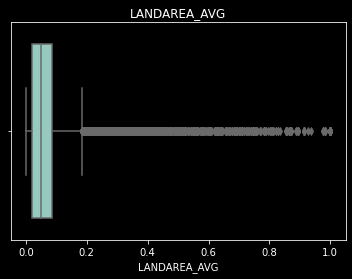

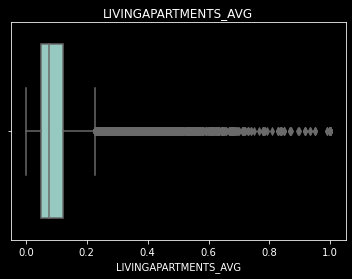

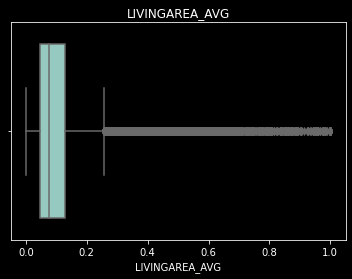

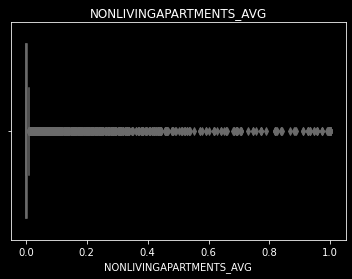

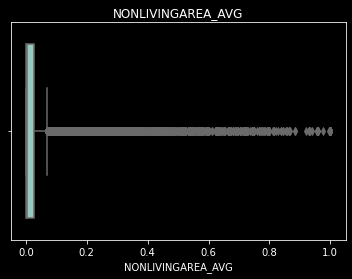

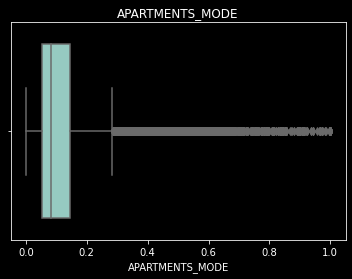

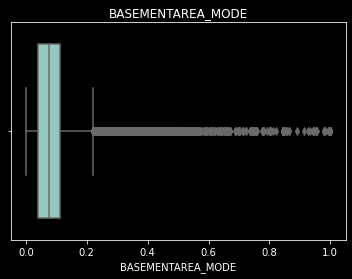

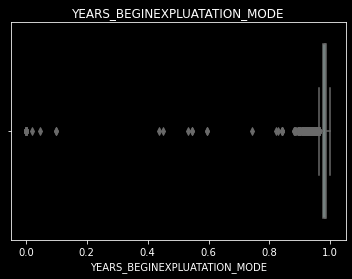

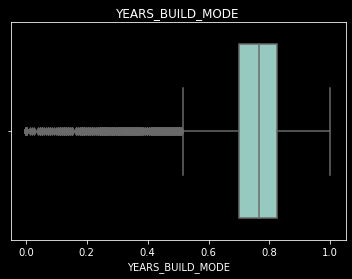

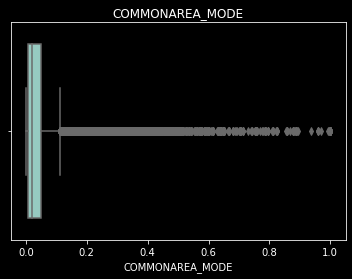

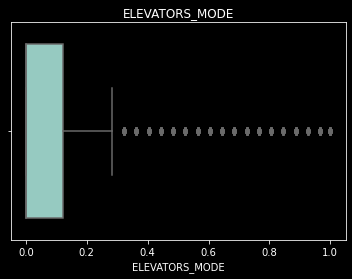

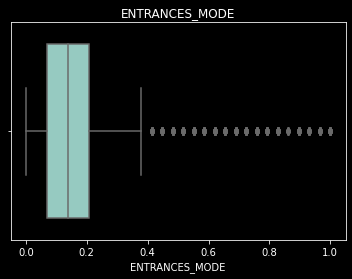

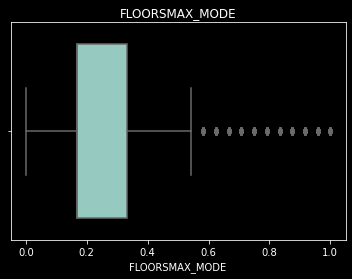

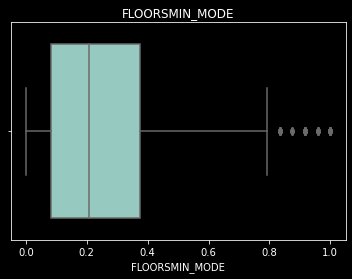

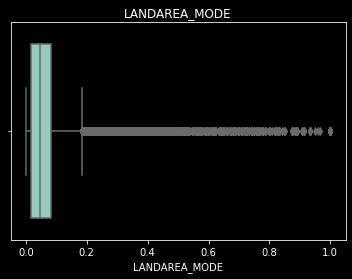

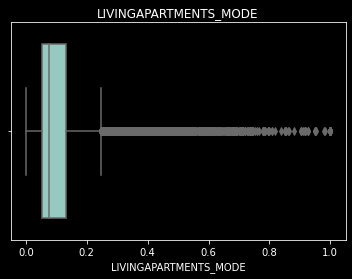

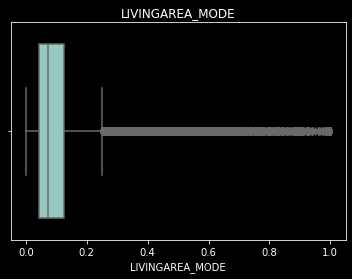

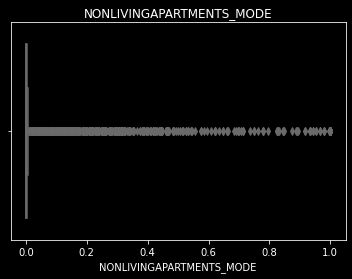

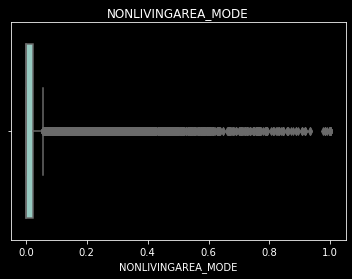

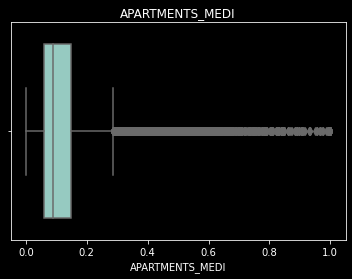

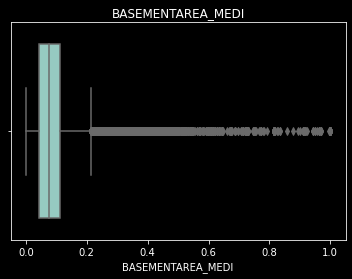

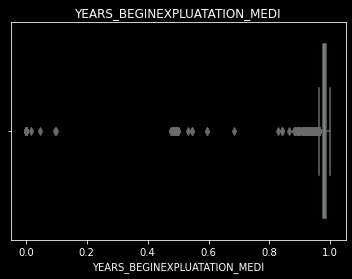

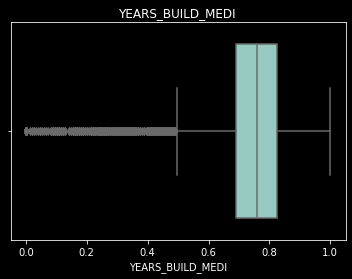

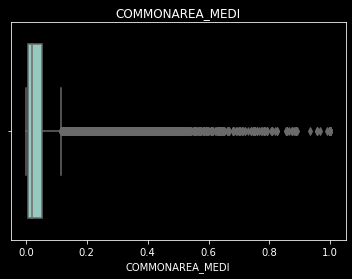

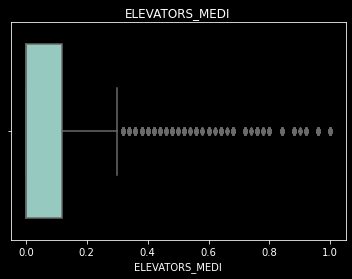

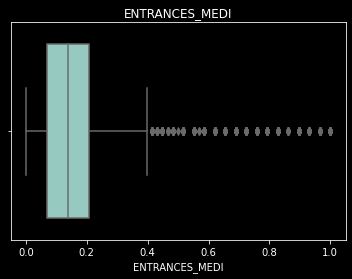

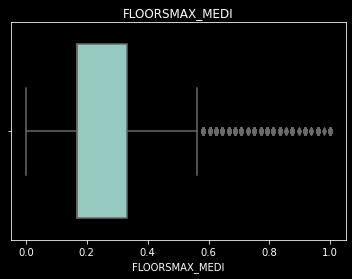

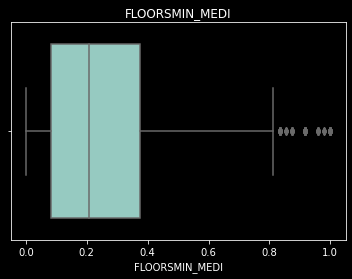

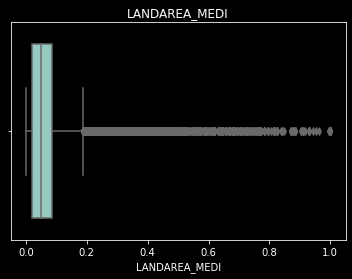

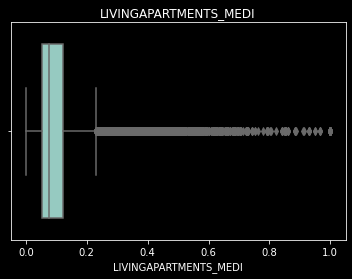

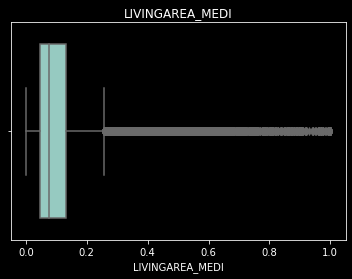

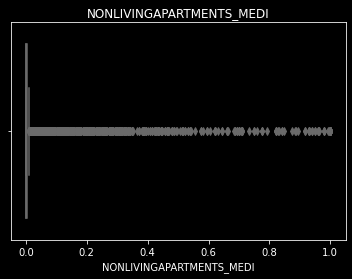

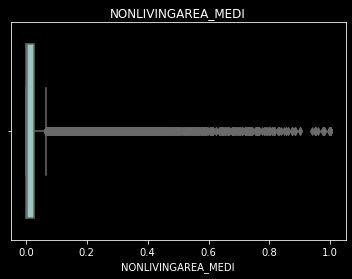

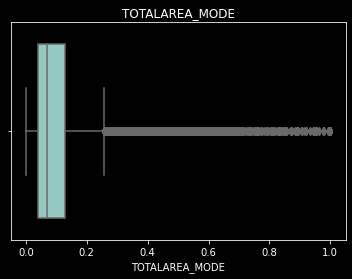

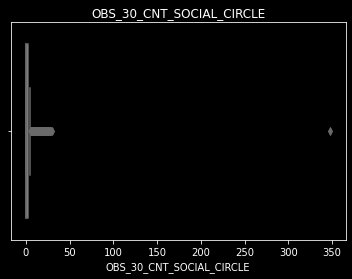

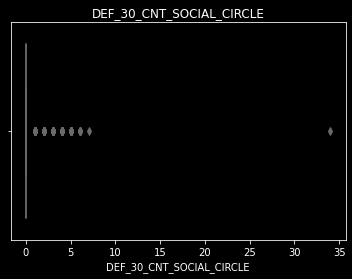

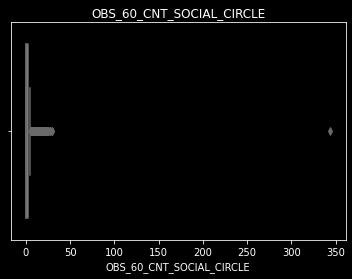

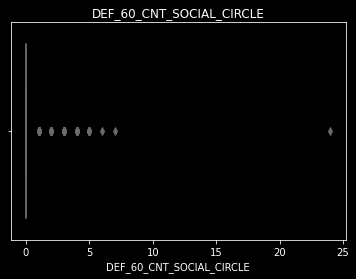

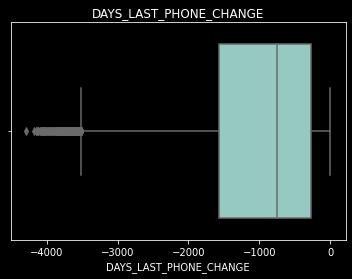

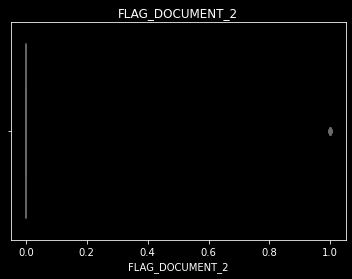

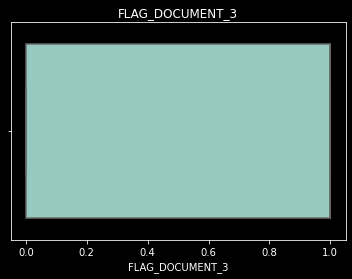

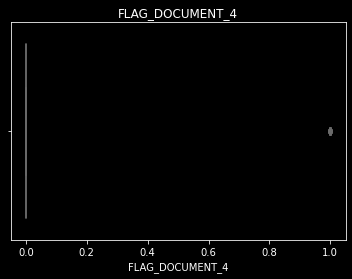

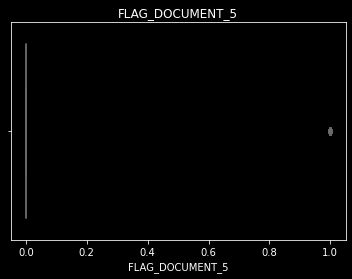

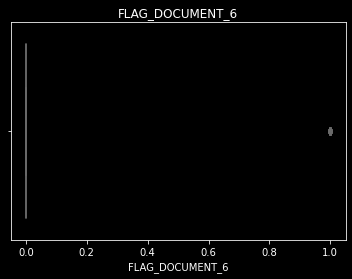

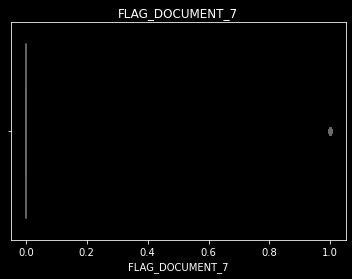

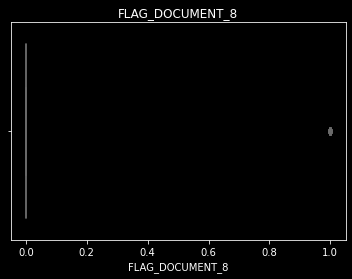

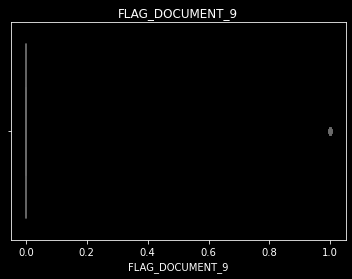

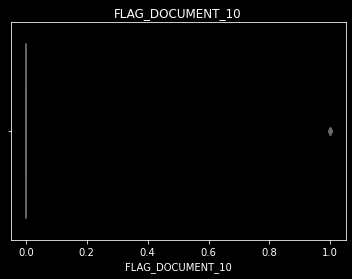

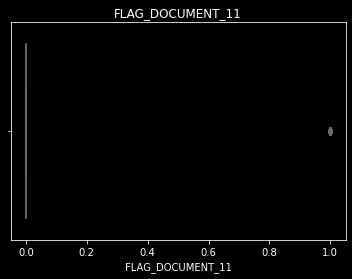

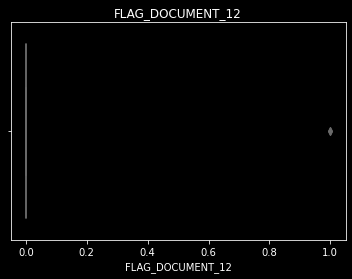

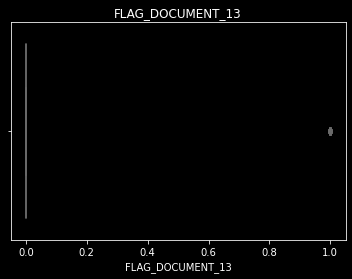

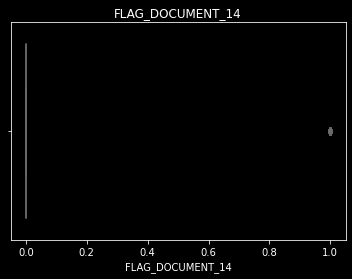

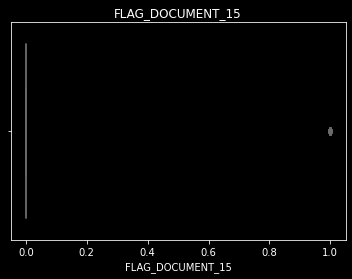

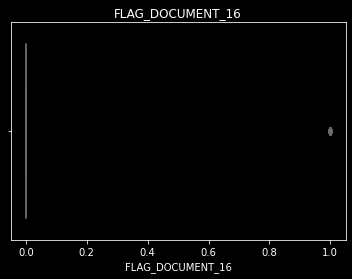

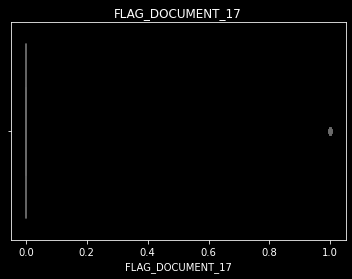

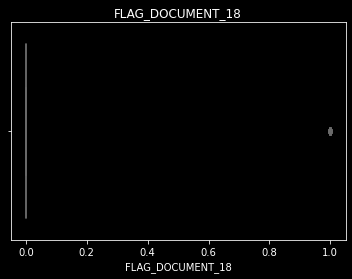

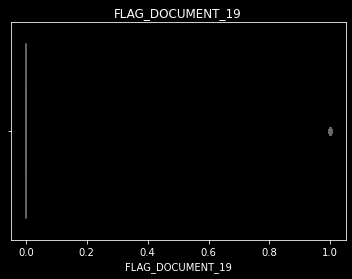

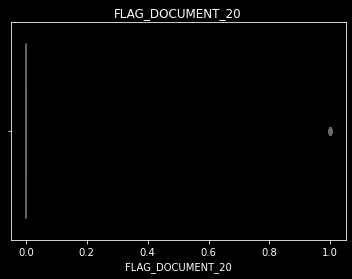

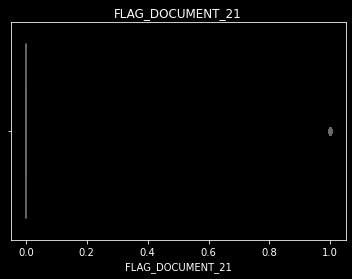

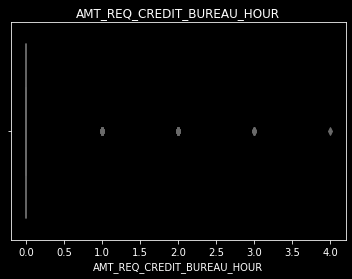

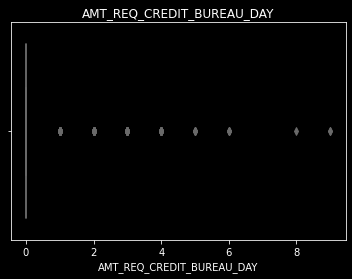

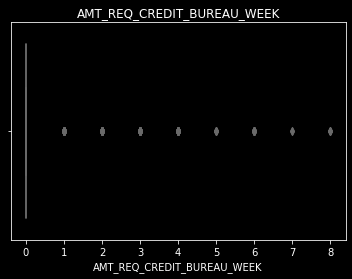

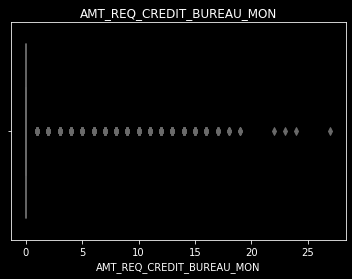

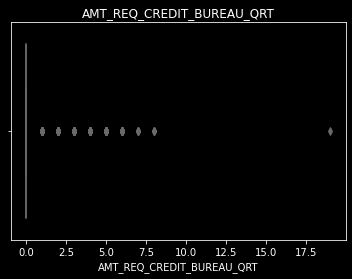

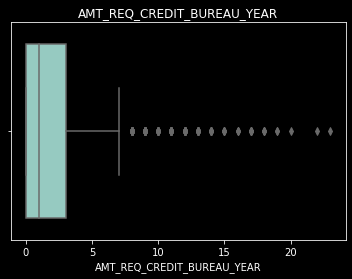

In [15]:
for col in df.drop(columns='TARGET').select_dtypes(include=[np.number]).columns:
    

    sns.boxplot(df[col]);
    plt.title(col);
    plt.show();

In [15]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     216989
1.0      22720
2.0       4228
3.0        984
4.0        219
5.0         44
6.0          9
7.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [16]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      131655
1.0       39219
2.0       23802
3.0       16112
4.0       11200
5.0        7528
6.0        5066
7.0        3494
8.0        2279
9.0        1570
10.0       1073
11.0        678
12.0        511
13.0        329
14.0        192
15.0        145
16.0        105
17.0         60
19.0         40
18.0         40
21.0         25
20.0         20
22.0         14
24.0         12
23.0         10
25.0          9
27.0          4
29.0          2
344.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [17]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     224506
1.0      17502
2.0       2551
3.0        499
4.0        119
5.0         15
7.0          1
6.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [18]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0     172406
1.0      27059
2.0      11544
3.0       1380
4.0        368
5.0         47
6.0         22
7.0          5
8.0          4
19.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [19]:
df['AMT_INCOME_TOTAL'].max()

117000000.0

In [20]:
df['AMT_ANNUITY'].max()

258025.5

In [21]:
df['OWN_CAR_AGE'].max()

91.0

In [7]:
# Remocao desses outliers/erros:
df_out = df.drop(index=df[df['DEF_30_CNT_SOCIAL_CIRCLE'] >= 34].index).copy()
df_out = df_out.drop(index=df_out[df_out['OBS_60_CNT_SOCIAL_CIRCLE'] >= 344].index).copy()
df_out = df_out.drop(index=df_out[df_out['DEF_60_CNT_SOCIAL_CIRCLE'] >= 24].index).copy()
df_out = df_out.drop(index=df_out[df_out['AMT_REQ_CREDIT_BUREAU_QRT'] >= 19].index).copy()
df_out = df_out.drop(index=df_out[df_out['AMT_REQ_CREDIT_BUREAU_QRT'] >= 19].index).copy()
df_out = df_out.drop(index=df_out[df_out['AMT_INCOME_TOTAL'] >= df_out['AMT_INCOME_TOTAL'].max()].index).copy()
df_out = df_out.drop(index=df_out[df_out['AMT_ANNUITY'] >= df_out['AMT_ANNUITY'].max()].index).copy()
df_out = df_out.drop(index=df_out[df_out['OWN_CAR_AGE'] >= df_out['OWN_CAR_AGE'].max()].index).copy()

Verificando se possuem dados duplicados:

In [23]:
df_out.duplicated().sum()

0

## Correlacao das features com o target

In [24]:
df_corr = pd.get_dummies(df_out).corr().abs()
df_corr = pd.DataFrame(df_corr['TARGET'].sort_values(ascending=False).drop('TARGET'))

In [25]:
fig = px.histogram(df_corr[:11], x=df_corr.index[:11], y='TARGET',
                   title='Top 10 features mais correlacionadas',
                   labels=dict(x="10 features mais correlacionadas", y="Correlacao (%)"),
                   histnorm='probability density')
fig.show();


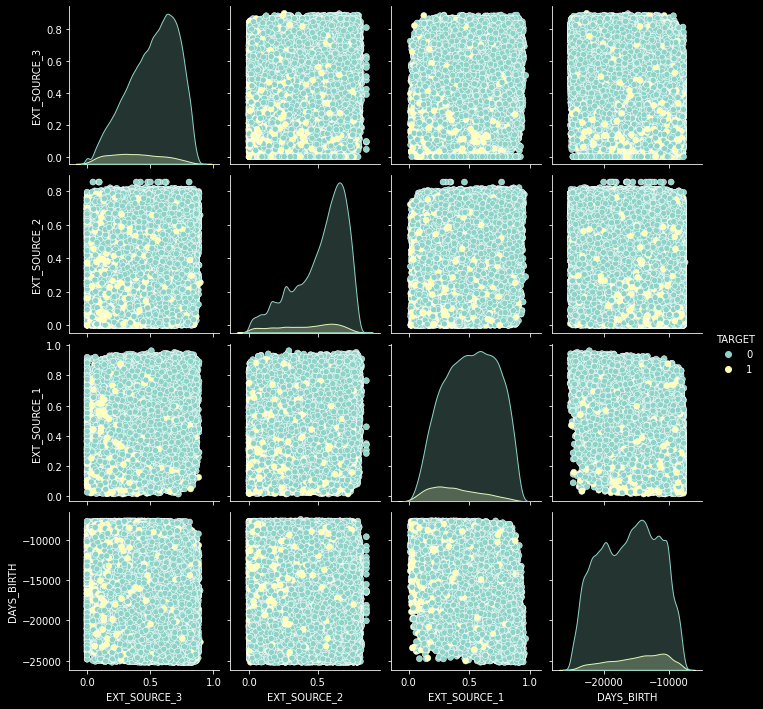

In [27]:
sns.pairplot(df_out[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH']], hue="TARGET")

Obtendo X e y de treino e teste e tambem o pre_processador

In [43]:
# Definindo o X e y e dados train - test
pre_processor, X_train, X_test, X_val, y_train, y_test = pre_processar(df_out, df_test, target='TARGET', cols=cols, features_test='median', cols_to_drop=['CODE_GENDER'])

   TARGET    TARGET
0  180827  0.918832
1   15974  0.081168


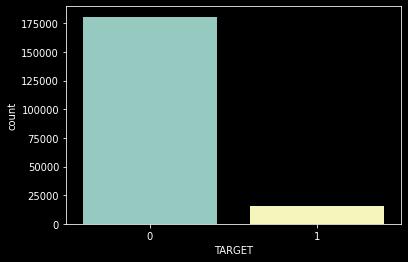

In [44]:
show_balance(y_train)

In [ ]:
# De inicio um modelo com pouca variancia de hiperparametros, para verificar as metricas

pipe = Pipeline([('pre_processor', pre_processor),
                 ('xgbc', XGBClassifier(booster='gbtree',
                                        objective='binary:logistic',
                                        eval_metric='auc',
                                        tree_method = "gpu_hist",
                                        predictor = 'gpu_predictor',
                                        n_jobs=-1,
                                        random_state=42,
                                        verbosity=0,
                                        use_label_encoder=False))])

pipe.fit(X_train, y_train)


Matriz de confusão do modelo nos dados de TREINO:
[[180575    252]
 [ 14477   1497]]


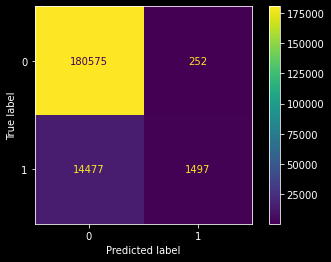


Classification report do modelo nos dados de treino:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    180827
           1       0.86      0.09      0.17     15974

    accuracy                           0.93    196801
   macro avg       0.89      0.55      0.56    196801
weighted avg       0.92      0.93      0.90    196801



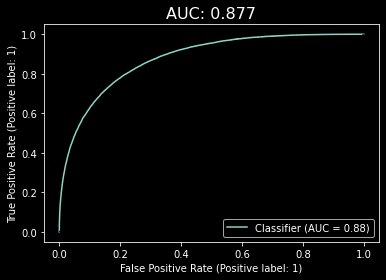

ROC-AUC score TREINO: 0.8773638475531859


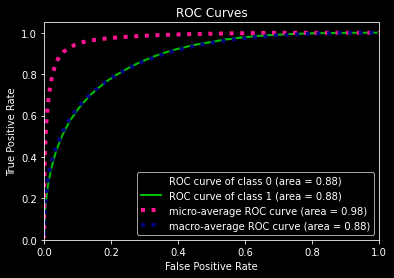

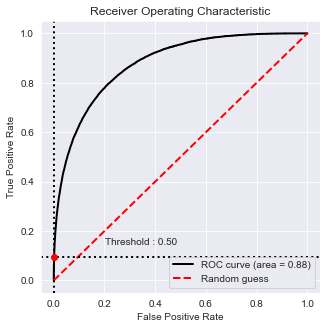


##########################################################


Matriz de confusão do modelo nos dados de TESTE:
[[45058   150]
 [ 3852   141]]


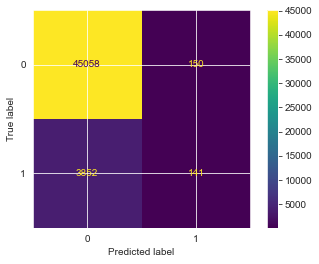


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45208
           1       0.48      0.04      0.07      3993

    accuracy                           0.92     49201
   macro avg       0.70      0.52      0.51     49201
weighted avg       0.89      0.92      0.89     49201



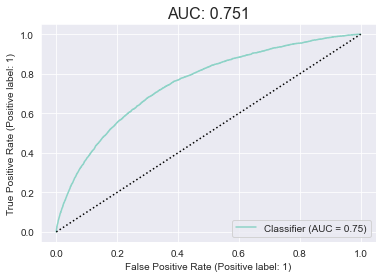

ROC-AUC score TEST: 0.750569347091794


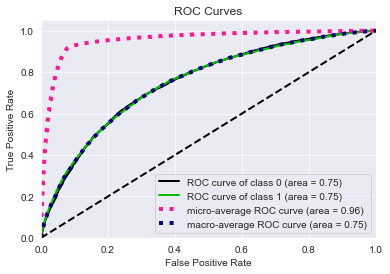

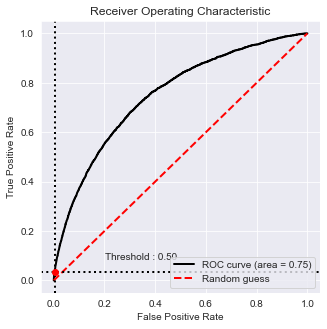

In [46]:
pontuacao_roc_auc(pipe, X_train, X_test, y_train, y_test)

Testando o preenchimento de valores com negative ao inves de median.

   TARGET    TARGET
0  180827  0.918832
1   15974  0.081168

Matriz de confusão do modelo nos dados de TREINO:
[[180562    265]
 [ 14426   1548]]


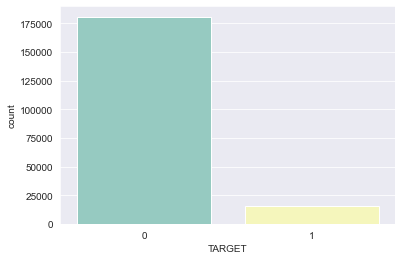

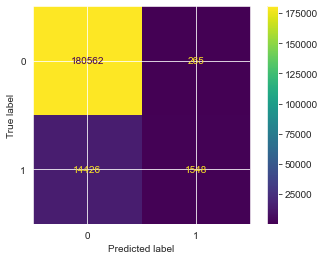


Classification report do modelo nos dados de treino:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    180827
           1       0.85      0.10      0.17     15974

    accuracy                           0.93    196801
   macro avg       0.89      0.55      0.57    196801
weighted avg       0.92      0.93      0.90    196801



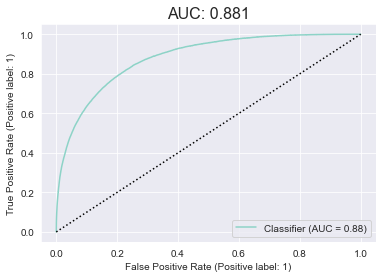

ROC-AUC score TREINO: 0.8808983890811597


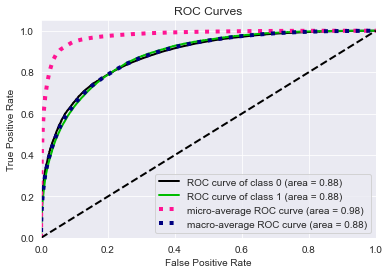

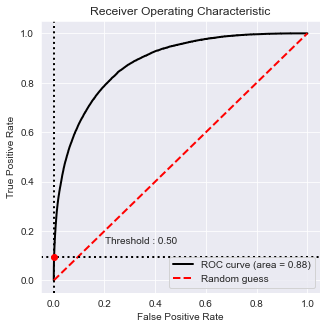


##########################################################


Matriz de confusão do modelo nos dados de TESTE:
[[45054   154]
 [ 3844   149]]


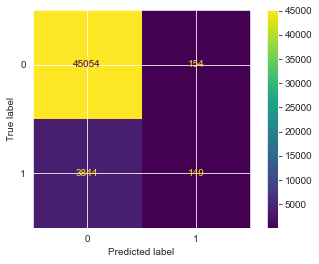


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45208
           1       0.49      0.04      0.07      3993

    accuracy                           0.92     49201
   macro avg       0.71      0.52      0.51     49201
weighted avg       0.89      0.92      0.89     49201



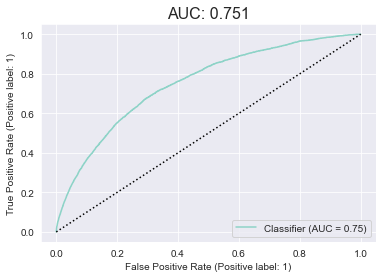

ROC-AUC score TEST: 0.7509107193561126


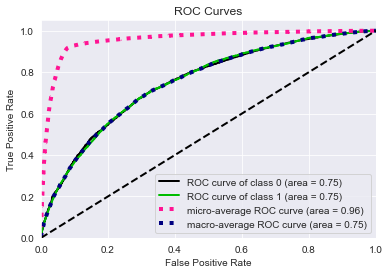

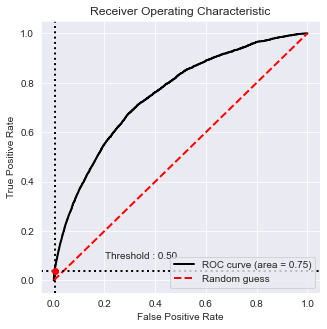

In [47]:
# Definindo o X e y e dados train - test
pre_processor, X_train, X_test, X_val, y_train, y_test = pre_processar(df_out, df_test, target='TARGET', cols=cols, features_test='negative', cols_to_drop=['CODE_GENDER'])
show_balance(y_train)
# De inicio um modelo com pouca variancia de hiperparametros, para verificar as metricas

pipe = Pipeline([('pre_processor', pre_processor),
                 ('xgbc', XGBClassifier(booster='gbtree',
                                        objective='binary:logistic',
                                        eval_metric='auc',
                                        tree_method = "gpu_hist",
                                        predictor = 'gpu_predictor',
                                        n_jobs=-1,
                                        random_state=42,
                                        verbosity=0,
                                        use_label_encoder=False))])

pipe.fit(X_train, y_train)
pontuacao_roc_auc(pipe, X_train, X_test, y_train, y_test)

## Testando com Undersampling dos dados

In [48]:
# Definindo o X e y e dados train - test
pre_processor, X_train, X_test, X_val, y_train, y_test = pre_processar(df_out, df_test, target='TARGET', cols=cols, features_test='median', cols_to_drop=['CODE_GENDER'], undersample=True, sampling_strategy='auto')

# Modelo sem modificacao de hiperparametros com undersample dos dados.

pipe = Pipeline([('pre_processor', pre_processor),
                 ('xgbc', XGBClassifier(booster='gbtree',
                                        objective='binary:logistic',
                                        eval_metric='auc',
                                        tree_method = "gpu_hist",
                                        predictor = 'gpu_predictor',
                                        n_jobs=-1,
                                        random_state=42,
                                        verbosity=0,
                                        use_label_encoder=False))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('median',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numeric_std',
                                                                   StandardScaler())]),
                                                  ['AMT_GOODS_PRICE',
                                                   'OBS_30_CNT_SOCIAL_CIRCLE',
                                                   'DEF_30_CNT_SOCIAL_CIRCLE',
                                                   'OBS_60_CNT_SOCIAL_CIRCLE',
                                                   'DEF_60_CNT_SOCIAL_CIRCLE',
                                                   'APARTMENTS_AVG',
                                                   'BASEMENTAREA_AVG',
                        

   TARGET  TARGET
0   15974     0.5
1   15974     0.5


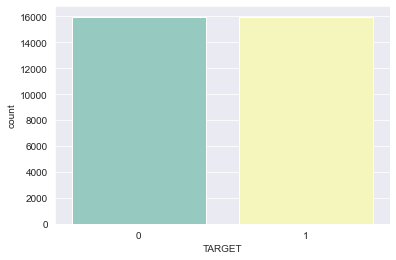

In [49]:
show_balance(y_train)


Matriz de confusão do modelo nos dados de TREINO:
[[13578  2396]
 [ 2189 13785]]


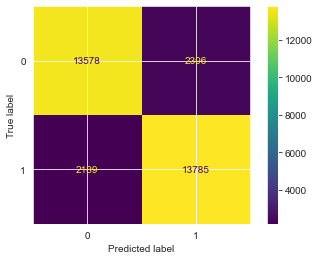


Classification report do modelo nos dados de treino:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     15974
           1       0.85      0.86      0.86     15974

    accuracy                           0.86     31948
   macro avg       0.86      0.86      0.86     31948
weighted avg       0.86      0.86      0.86     31948



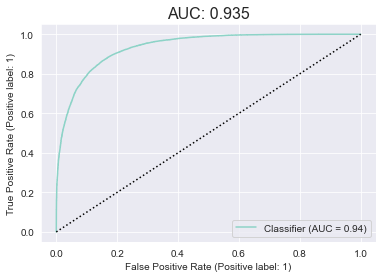

ROC-AUC score TREINO: 0.9353534816318914


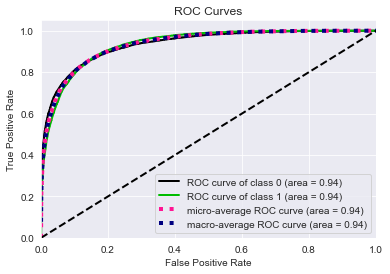

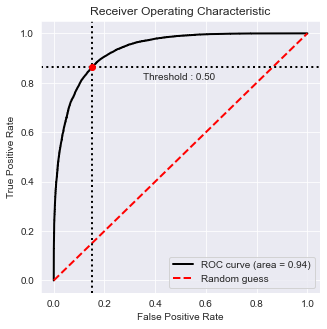


##########################################################


Matriz de confusão do modelo nos dados de TESTE:
[[30678 14530]
 [ 1279  2714]]


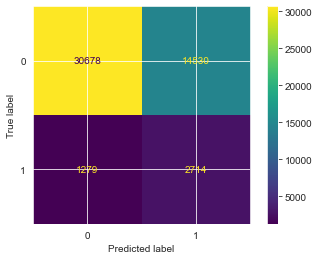


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     45208
           1       0.16      0.68      0.26      3993

    accuracy                           0.68     49201
   macro avg       0.56      0.68      0.53     49201
weighted avg       0.89      0.68      0.75     49201



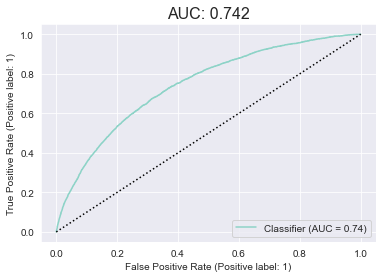

ROC-AUC score TEST: 0.7418601663466722


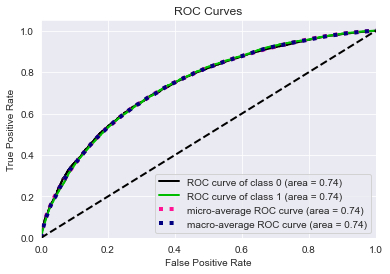

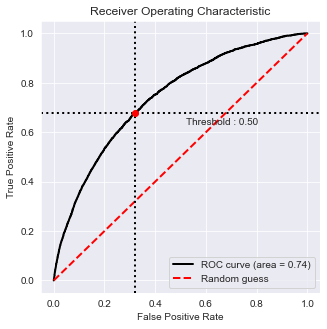

In [50]:
pontuacao_roc_auc(pipe, X_train, X_test, y_train, y_test)

Um pouco pior o score de teste, o de treino overfitou bem mais.

## Testando agora o contrario, Oversample.

In [ ]:
# Definindo o X e y e dados train - test
pre_processor, X_train, X_test, X_val, y_train, y_test = pre_processar(df_out, df_test, target='TARGET', cols=cols, features_test='median', cols_to_drop=['CODE_GENDER'], oversample=True, sampling_strategy='auto')

# Modelo sem modificacao de hiperparametros com oversample dos dados.

pipe = Pipeline([('pre_processor', pre_processor),
                 ('xgbc', XGBClassifier(booster='gbtree',
                                        objective='binary:logistic',
                                        eval_metric='auc',
                                        tree_method = "gpu_hist",
                                        predictor = 'gpu_predictor',
                                        n_jobs=-1,
                                        random_state=42,
                                        verbosity=0,
                                        use_label_encoder=False))])

pipe.fit(X_train, y_train)

   TARGET  TARGET
0  180827     0.5
1  180827     0.5


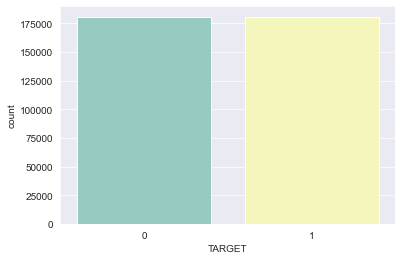

In [52]:
show_balance(y_train)


Matriz de confusão do modelo nos dados de TREINO:
[[141580  39247]
 [ 29672 151155]]


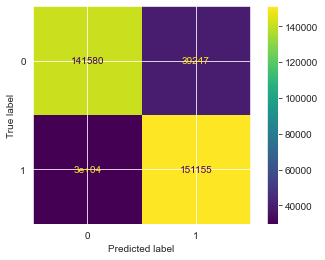


Classification report do modelo nos dados de treino:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80    180827
           1       0.79      0.84      0.81    180827

    accuracy                           0.81    361654
   macro avg       0.81      0.81      0.81    361654
weighted avg       0.81      0.81      0.81    361654



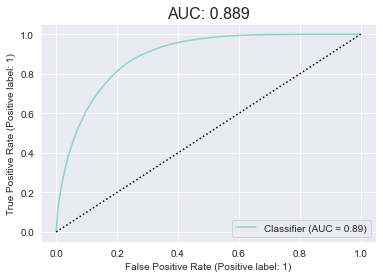

ROC-AUC score TREINO: 0.8888520121382222


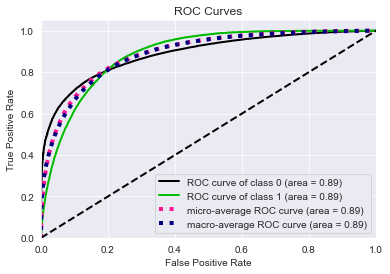

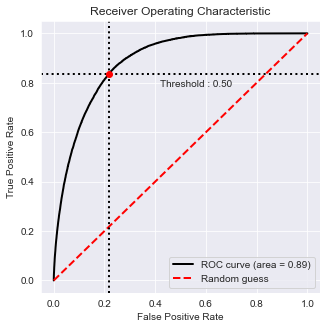


##########################################################


Matriz de confusão do modelo nos dados de TESTE:
[[34721 10487]
 [ 1663  2330]]


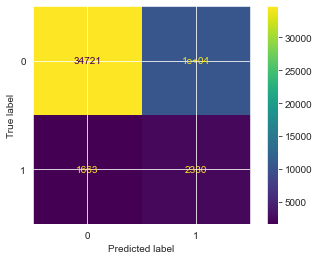


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     45208
           1       0.18      0.58      0.28      3993

    accuracy                           0.75     49201
   macro avg       0.57      0.68      0.56     49201
weighted avg       0.89      0.75      0.80     49201



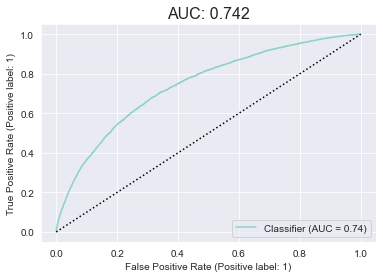

ROC-AUC score TEST: 0.741663130683084


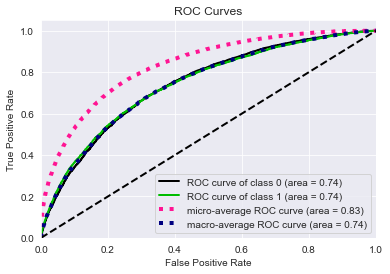

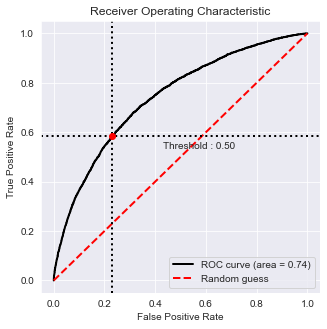

In [53]:
pontuacao_roc_auc(pipe, X_train, X_test, y_train, y_test)

## Testando com Class Weight

In [ ]:
# Definindo o X e y e dados train - test
pre_processor, X_train, X_test, X_val, y_train, y_test = pre_processar(df_out, df_test, target='TARGET', cols=cols, features_test='median', cols_to_drop=['CODE_GENDER'])

# Modelo sem modificacao de hiperparametros apenas ajuste do Class Weight.

pipe = Pipeline([('pre_processor', pre_processor),
                 ('xgbc', XGBClassifier(booster='gbtree',
                                        objective='binary:logistic',
                                        eval_metric='auc',
                                        tree_method = "gpu_hist",
                                        predictor = 'gpu_predictor',
                                        # sum(minority)/sum(majority)
                                        scale_pos_weight = 100 * (y_train[y_train == 1].shape[0]/y_train[y_train == 0].shape[0]),
                                        n_jobs=-1,
                                        random_state=42,
                                        verbosity=0,
                                        use_label_encoder=False))])

pipe.fit(X_train, y_train)


Matriz de confusão do modelo nos dados de TREINO:
[[150686  30141]
 [  3801  12173]]


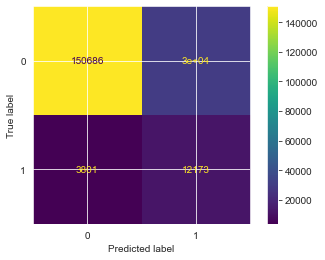


Classification report do modelo nos dados de treino:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90    180827
           1       0.29      0.76      0.42     15974

    accuracy                           0.83    196801
   macro avg       0.63      0.80      0.66    196801
weighted avg       0.92      0.83      0.86    196801



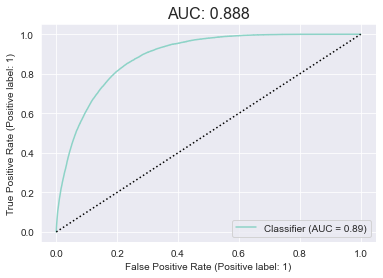

ROC-AUC score TREINO: 0.8881361219056791


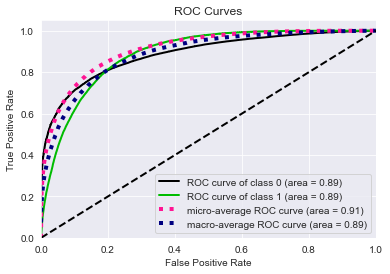

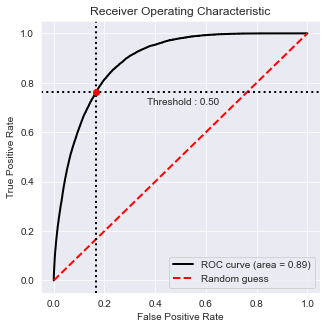


##########################################################


Matriz de confusão do modelo nos dados de TESTE:
[[37094  8114]
 [ 1896  2097]]


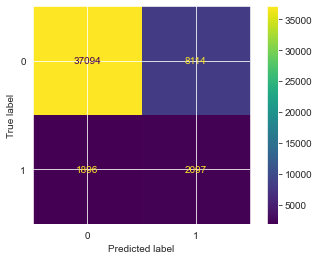


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     45208
           1       0.21      0.53      0.30      3993

    accuracy                           0.80     49201
   macro avg       0.58      0.67      0.59     49201
weighted avg       0.89      0.80      0.83     49201



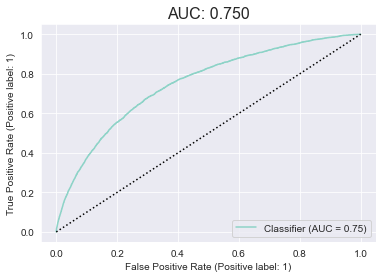

ROC-AUC score TEST: 0.749682567502331


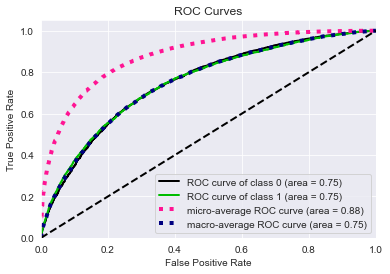

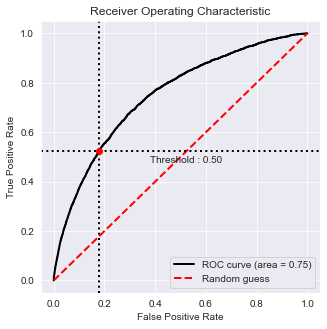

In [57]:
pontuacao_roc_auc(pipe, X_train, X_test, y_train, y_test)

#### Aqui, nao obtivemos melhores resultados, visando nosso score (ROC-AUC) de teste, por volta de 0.75 o maximo obtido (ate agora).

## Utilizando otimizacao bayesiana de hiperparametros com optuna no XGBoost. Ajustando o desbalanceamento com o scale_pos_weight do XGBoostClassifier

In [8]:
pre_processor, X_train, X_test, X_val, y_train, y_test = pre_processar(df_out, df_test, target='TARGET', cols=cols, features_test='median', cols_to_drop=['CODE_GENDER'])

In [ ]:
def return_auc(params):
    model = Pipeline ([('pre_processor', pre_processor),
                       ('xgbc', XGBClassifier(booster='gbtree',
                                              objective='binary:logistic',
                                              eval_metric='auc',
                                              grow_policy='lossguide',
                                              tree_method = "gpu_hist",
                                              scale_pos_weight = 100 * (y_train[y_train == 1].shape[0]/y_train[y_train == 0].shape[0]),
                                              single_precision_histogram=True,
                                              predictor = 'gpu_predictor',
                                              n_jobs=-1,
                                              random_state=42,
                                              verbosity=0,
                                              use_label_encoder=False,
                                              **params))])

    model.fit(X_train, y_train)
    result = roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:, 1])
    return result

def objective(trial):
    param = {'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.03, step=0.001),
             'n_estimators': trial.suggest_int('n_estimators', 4000, 9000),
             'gamma': trial.suggest_loguniform('gamma', 1e-8, 0.01),
             'reg_alpha': trial.suggest_float('reg_alpha', 0.5, 1, step=0.01),
             'reg_lambda':trial.suggest_float('reg_lambda', 0.01, 0.5, step=0.01),
             'max_depth': trial.suggest_int('max_depth', 3, 3),
             'max_delta_step': trial.suggest_int('max_delta_step', 0, 3),
             'subsample': trial.suggest_float('subsample', 0.7, 0.9, step=0.001),
             'min_child_weight': trial.suggest_int('min_child_weight', 0, 15),
             'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0, step=0.01),
             'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.4, 0.9, step=0.01),
             'colsample_bynode': trial.suggest_float('colsample_bynode', 0.5, 0.8, step=0.01),
            #  'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
            #  'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
             }
    
    return (return_auc(param))


study1 = optuna.create_study(direction='maximize', sampler=TPESampler())
study1.optimize(objective, n_trials=200, show_progress_bar=False, gc_after_trial=True, n_jobs=6)

In [18]:
study1.best_value

0.7666388746001841

In [19]:
study1.best_params

{'learning_rate': 0.011,
 'n_estimators': 7334,
 'gamma': 0.007393143480054794,
 'reg_alpha': 0.6,
 'reg_lambda': 0.21000000000000002,
 'max_depth': 3,
 'max_delta_step': 1,
 'subsample': 0.7609999999999999,
 'min_child_weight': 0,
 'colsample_bytree': 1.0,
 'colsample_bylevel': 0.89,
 'colsample_bynode': 0.7}

 Trial 161 finished with value: 0.7666388746001841 and parameters: {'learning_rate': 0.011, 'n_estimators': 7334, 'gamma': 0.007393143480054794, 'reg_alpha': 0.6, 'reg_lambda': 0.21000000000000002, 'max_depth': 3, 'max_delta_step': 1, 'subsample': 0.7609999999999999, 'min_child_weight': 0, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.89, 'colsample_bynode': 0.7}. Best is trial 161 with value: 0.7666388746001841.

In [20]:
pd.Series(study1.best_params, name='Best params').map('{:.10f}'.format)

learning_rate           0.0110000000
n_estimators         7334.0000000000
gamma                   0.0073931435
reg_alpha               0.6000000000
reg_lambda              0.2100000000
max_depth               3.0000000000
max_delta_step          1.0000000000
subsample               0.7610000000
min_child_weight        0.0000000000
colsample_bytree        1.0000000000
colsample_bylevel       0.8900000000
colsample_bynode        0.7000000000
Name: Best params, dtype: object

In [21]:
optuna.visualization.plot_param_importances(study1)

In [22]:
optuna.visualization.plot_optimization_history(study1)

In [23]:
#Plotando
optuna.visualization.plot_slice(study1)

In [ ]:
modelo = Pipeline ([('pre_processor', pre_processor),
                    ('xgbc', XGBClassifier(booster='gbtree',
                                           objective='binary:logistic',
                                           eval_metric='auc',
                                           grow_policy='lossguide',
                                           tree_method = "gpu_hist",
                                           scale_pos_weight = 100 * (y_train[y_train == 1].shape[0]/y_train[y_train == 0].shape[0]),
                                           single_precision_histogram=True,
                                           predictor = 'gpu_predictor',
                                           n_jobs=-1,
                                           random_state=42,
                                           verbosity=0,
                                           use_label_encoder=False,
                                           **study1.best_params))])
modelo.fit(X_train, y_train)


Matriz de confusão do modelo nos dados de TREINO:
[[144936  35891]
 [  5475  10499]]


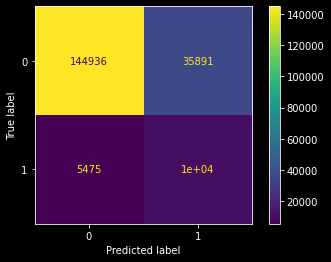


Classification report do modelo nos dados de treino:
              precision    recall  f1-score   support

           0       0.96      0.80      0.88    180827
           1       0.23      0.66      0.34     15974

    accuracy                           0.79    196801
   macro avg       0.59      0.73      0.61    196801
weighted avg       0.90      0.79      0.83    196801



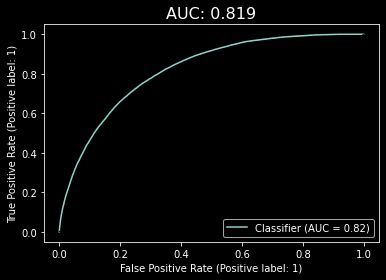

ROC-AUC score TREINO: 0.8187322756804765


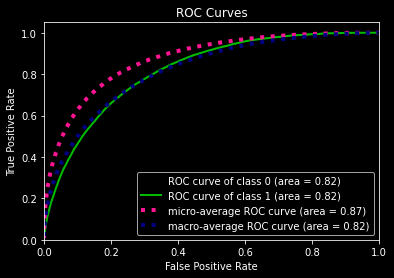

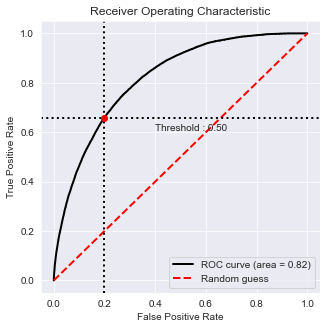


##########################################################


Matriz de confusão do modelo nos dados de TESTE:
[[36121  9087]
 [ 1690  2303]]


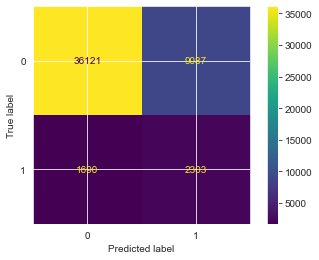


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     45208
           1       0.20      0.58      0.30      3993

    accuracy                           0.78     49201
   macro avg       0.58      0.69      0.58     49201
weighted avg       0.89      0.78      0.82     49201



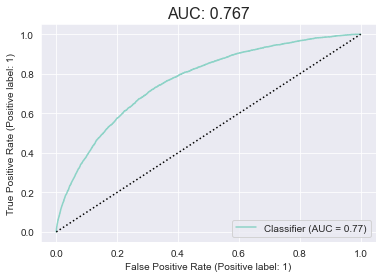

ROC-AUC score TEST: 0.7666388746001841


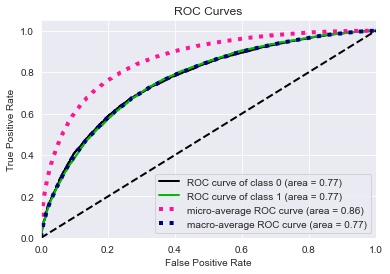

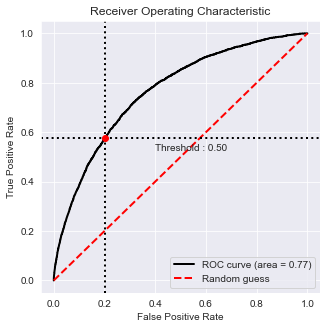

In [25]:
pontuacao_roc_auc(modelo, X_train, X_test, y_train, y_test)

In [26]:
from joblib import dump

dump(modelo, 'modelo_xgbclassifier_FINAL.jolib')

['modelo_xgbclassifier_FINAL.jolib']

In [28]:
from joblib import load

model = load('modelo_xgbclassifier_FINAL.jolib')

Utilizando o melhor modelo:

In [34]:
df_test

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
149741             Cash loans           F            N               N   
363290             Cash loans           M            N               Y   
436006        Revolving loans           M            Y               Y   
377703             Cash loans           M            Y               N   
188624             Cash loans           M            Y               Y   
...                       ...         ...          ...             ...   
102817             Cash loans           M            Y               N   
343961             Cash loans           M            N               Y   
427828             Cash loans           F            Y               Y   
405956             Cash loans           F            N               Y   
425814             Cash loans           F            Y               Y   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
149741                 0          117000.0    417024.0      20191.5   
363290                 0          450000.0    640080.0      31261.5   
436006                 0          450000.0    900000.0      45000.0   
377703                 1          360000.0   1125000.0      33025.5   
188624                 0          675000.0    835380.0      42840.0   
...                  ...               ...         ...          ...   
102817                 0          225000.0    472500.0      46161.0   
343961                 0          112500.0    508495.5      24592.5   
427828                 0          157500.0    808650.0      23643.0   
405956                 0          202500.0    590337.0      30271.5   
425814                 1          135000.0     78192.0       9409.5   

            AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
SK_ID_CURR                                                           
149741             360000.0  Spouse, partner               Working   
363290             450000.0    Unaccompanied  Commercial associate   
436006             900000.0    Unaccompanied  Commercial associate   
377703            1125000.0    Unaccompanied               Working   
188624             675000.0    Unaccompanied               Working   
...                     ...              ...                   ...   
102817             454500.0    Unaccompanied               Working   
343961             454500.0  Spouse, partner             Pensioner   
427828             675000.0    Unaccompanied             Pensioner   
405956             477000.0    Unaccompanied  Commercial associate   
425814              67500.0    Unaccompanied               Working   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
149741                  Incomplete higher               Married   
363290                   Higher education               Married   
436006                   Higher education  Single / not married   
377703      Secondary / secondary special               Married   
188624                  Incomplete higher  Single / not married   
...                                   ...                   ...   
102817      Secondary / secondary special             Separated   
343961      Secondary / secondary special               Married   
427828      Secondary / secondary special        Civil marriage   
405956      Secondary / secondary special        Civil marriage   
425814                   Higher education  Single / not married   

              NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                                
149741        House / apartment                    0.020246      -21774   
363290        House / apartment                    0.046220      -18499   
436006        House / apartment          

In [35]:
real_test_idx = df_test.index

In [36]:
precit_proba_inadimplencia = model.predict_proba(X_val)[:, 1]

In [37]:
teste_final = pd.DataFrame(data=[real_test_idx, precit_proba_inadimplencia]).T.rename(columns={0:'SK_ID_CURR', 1:'probabilidade de inadimplência'})

In [38]:
teste_final

SK_ID_CURR  probabilidade de inadimplência
0        149741.0                        0.749091
1        363290.0                        0.240983
2        436006.0                        0.395701
3        377703.0                        0.272385
4        188624.0                        0.820117
...           ...                             ...
61498    102817.0                        0.272631
61499    343961.0                        0.426188
61500    427828.0                        0.213124
61501    405956.0                        0.440093
61502    425814.0                        0.184594

[61503 rows x 2 columns]

In [39]:
teste_final.to_csv('predicoes.csv', index=False)

### Explicando o modelo

In [41]:
X_train_n = pre_processor.fit_transform(X_train)

In [34]:
pd.get_dummies(X_train)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
335966                 0          112500.0    315000.0      15750.0   
295581                 0           90000.0    247500.0      12375.0   
283677                 0          351000.0   1288350.0      34114.5   
220546                 2          180000.0   1078200.0      31653.0   
396007                 0          135000.0   1288350.0      37669.5   
...                  ...               ...         ...          ...   
357025                 0           67500.0    199008.0      19386.0   
222490                 1          225000.0    450000.0      41773.5   
101438                 1          112500.0    436032.0      34578.0   
124235                 1          225000.0    553500.0      23580.0   
128697                 0          202500.0    675000.0      36094.5   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                            
335966             315000.0                    0.035792      -18601   
295581             247500.0                    0.031329       -8072   
283677            1125000.0                    0.006207      -13835   
220546             900000.0                    0.007114      -13989   
396007            1125000.0                    0.031329      -19563   
...                     ...                         ...         ...   
357025             180000.0                    0.031329      -17106   
222490             450000.0                    0.001417      -14411   
101438             360000.0                    0.030755       -9615   
124235             553500.0                    0.015221      -14286   
128697             675000.0                    0.003541      -17608   

            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
SK_ID_CURR                                                                   
335966              -3534             -278.0            -2102          0.0   
295581              -1184            -8018.0             -756         64.0   
283677              -2596            -1748.0            -4649          NaN   
220546              -5214             -782.0            -4705          NaN   
396007               -480           -13013.0            -3113          0.0   
...                   ...                ...              ...          ...   
357025              -5340            -1234.0             -593          NaN   
222490              -5061            -3704.0            -4368          NaN   
101438              -1128            -3842.0              -86          NaN   
124235              -2289            -8297.0            -3736          NaN   
128697               -129            -7995.0            -1167          NaN   

            FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
SK_ID_CURR                                                                  
335966               1               1                0                 1   
295581               1               1                0                 1   
283677               1               1                0                 1   
220546               1               1                0                 1   
396007               1               1                1                 1   
...                ...             ...              ...               ...   
357025               1               1                1                 1   
222490               1               1                0                 1   
101438               1               1                0                 1   
124235               1               1                0                 1   
128697               1               1                0                 1   

            FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
SK_ID_CURR                                                            

In [42]:
pd.DataFrame(X_train_n).describe()

0             1             2             3             4    \
count  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05   
mean   5.713558e-17 -9.269864e-18 -2.644664e-18  2.103095e-17 -3.959775e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.335504e+00 -6.113924e-01 -3.236180e-01 -6.093722e-01 -2.776455e-01   
25%   -8.118866e-01 -6.113924e-01 -3.236180e-01 -6.093722e-01 -2.776455e-01   
50%   -2.395611e-01 -6.113924e-01 -3.236180e-01 -6.093722e-01 -2.776455e-01   
75%    3.814729e-01  2.510149e-01 -3.236180e-01  2.606145e-01 -2.776455e-01   
max    9.502149e+00  1.232472e+01  1.545701e+01  1.200544e+01  1.909169e+01   

                5             6             7             8             9    \
count  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05   
mean   2.964551e-16  4.067999e-16 -1.214433e-15 -2.047494e-15 -8.773425e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.322527e+00 -1.533537e+00 -2.301139e+01 -1.155039e+01 -6.528397e-01   
25%   -1.898953e-01 -9.344209e-02  4.664629e-02  1.391883e-02 -1.648636e-01   
50%   -1.898953e-01 -9.344209e-02  4.664629e-02  1.391883e-02 -1.648636e-01   
75%   -1.898953e-01 -9.344209e-02  5.839142e-02  1.391883e-02 -1.648636e-01   
max    1.160706e+01  1.731588e+01  4.788671e-01  3.762519e+00  2.247399e+01   

                10            11            12            13            14   \
count  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05   
mean   1.929070e-16 -3.254110e-16  7.240964e-16 -9.405256e-18 -2.579992e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.035787e+00 -1.841733e+00 -2.341042e+00 -1.055086e+00 -1.573564e+00   
25%   -8.272226e-02 -2.791759e-01 -8.175394e-02 -1.396800e-01 -1.488317e-01   
50%   -8.272226e-02 -2.791759e-01 -8.175394e-02 -1.396800e-01 -1.488317e-01   
75%   -8.272226e-02 -2.791759e-01 -8.175394e-02 -1.396800e-01 -1.488317e-01   
max    1.212712e+01  7.531733e+00  8.505275e+00  1.797623e+01  1.727210e+01   

                15            16            17            18            19   \
count  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05   
mean   1.042702e-16  4.323529e-17  6.178405e-17 -1.611350e-16  1.555072e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.139772e+00 -1.024957e-01 -3.076069e-01 -1.278796e+00 -1.471788e+00   
25%   -2.046519e-01 -1.024957e-01 -2.321534e-01 -1.928773e-01 -9.746938e-02   
50%   -2.046519e-01 -1.024957e-01 -2.321534e-01 -1.928773e-01 -9.746938e-02   
75%   -2.046519e-01 -1.024957e-01 -2.321534e-01 -1.928773e-01 -9.746938e-02   
max    1.139535e+01  3.866081e+01  2.065171e+01  1.164881e+01  1.692605e+01   

                20            21            22            23            24   \
count  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05   
mean  -2.656579e-16  3.352495e-16  5.016738e-17 -6.430235e-17 -8.218316e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.112787e+01 -1.201595e+01 -6.164032e-01 -1.988774e+00 -1.842559e+00   
25%    3.942825e-02  2.728592e-02 -1.683875e-01 -5.038163e-02 -2.632643e-01   
50%    5.021578e-02  2.728592e-02 -1.683875e-01 -5.038163e-02 -2.632643e-01   
75%    5.021578e-02  2.728592e-02 -1.683875e-01 -5.038163e-02 -2.632643e-01   
max    4.471969e-01  3.730960e+00  2.296337e+01  1.206773e+01  7.631312e+00   

                25            26            27            28            29   \
count  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05  1.968010e+05   
mean   2.962385e-17  3.141103e-17  7.479977e-17  3.915547e-17  6.101683e-18   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.335446e+00 -1.012009e+00 -1.521893e+00 -1.108426e+00 -9.697370e-02   
25%   -6.836503e-02 -1.458497e-01 -1.590020e-01 -2.029898e-01

In [29]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [59]:
shap_vals = explainer.shap_values(X_train)

In [ ]:
shap_vals

In [ ]:
shap.summary_plot(shap_vals, X_train)

In [60]:
shap_vals

array([[ 5.99184919e-03,  1.64486554e-02,  2.63966383e-02, ...,
        -6.47697411e-04,  1.07023177e-04, -6.02025345e-03],
       [ 3.30619624e-03,  2.70547324e-03, -4.59852063e-01, ...,
         3.67808230e-04,  6.55114297e-05,  1.06857300e-03],
       [ 1.10215175e-02, -5.69428467e-02,  3.44368606e-01, ...,
        -6.25723072e-04,  9.75137490e-05,  5.09541584e-04],
       ...,
       [ 3.16225655e-03, -1.57360554e-02, -1.38957185e-01, ...,
         7.78090237e-05,  2.37438003e-05, -7.47503314e-04],
       [ 9.69703924e-03, -1.59859484e-02,  1.82326682e-01, ...,
        -6.44868514e-04,  1.11229797e-04, -6.02025345e-03],
       [ 2.66266506e-03, -5.65064023e-02,  3.18140702e-01, ...,
        -2.02315040e-06,  9.79225752e-05,  5.09541584e-04]])

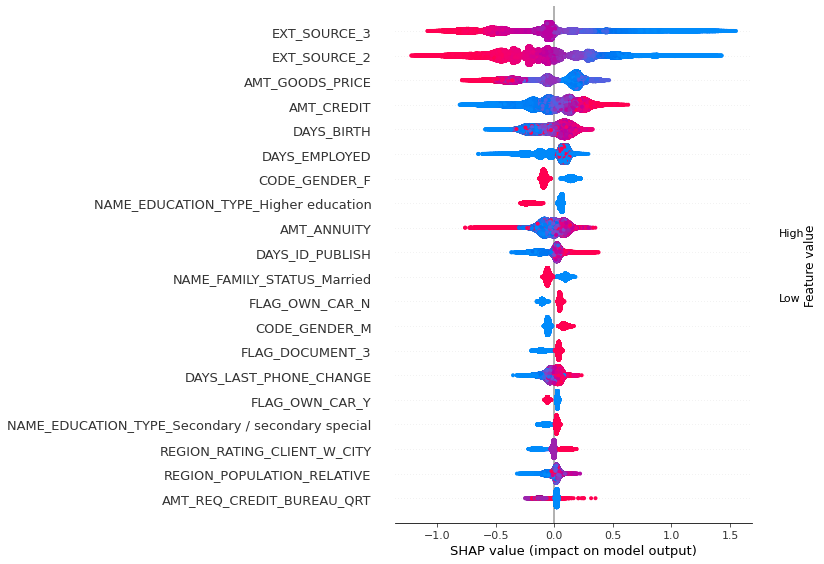

In [61]:
shap.summary_plot(shap_vals, X_train)